# Importing basic libraries

In [ ]:
!pip install pingouin
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene, kruskal
from pingouin import pairwise_ttests
import itertools

## Importing Dataset

In [ ]:
df = pd.read_excel('12.xlsx')
# Names for subsequent process
column_names = df.columns
print(column_names)
df.shape

Index(['Code', 'Time (Month)', 'Free_Acidity (% oleic acid)',
       'Peroxide_Value (mEqO2/Kg olive oil)', 'K232', 'K268',
       'Oxidative_Stability (h)', 'TPC (mg galic acid/Kg olive oil)',
       'DPPH (%inhibition)', '1_Penten_3_one', '3_Pentanone', '1_Pentanol',
       '(E)_2_Pentenal', '(Z)_2_Penten_1_ol', '(Z)_3_Hexenal', '(E)_2_Hexenal',
       '(Z)_3_Hexen_1_ol', '(E)_2_Hexenol', '1_Hexanol', '2_Heptanone',
       '3_Ethyl_1,5_octadiene(IsomerI)', 'Heptanal', '(E,E)_2,4_Hexadienal',
       '(Z)_2_Pentenylacetate', '3_Ethyl_1,5_octadieneIsomerII',
       '3_Ethyl_1,5_octadieneIsomerIII', '(E)_2_Heptenal',
       '(E)_4_Oxohex_2_enal', '1_Heptanol', 'Hexanoic_acid',
       '6_methyl_5_Hepten_2_one', 'β_Myrcene', '(E,E)_2,4,Heptadienal',
       '4,8_dimethyl_1,7_Nonadiene', 'Decane', 'Octanal',
       '(Z)_3_hexenylacetate', 'Hexyl_ester_acetic_acid', 'D_Limonene',
       '2_ethyl_1_Hexanol', '3,3,6_trimethyl_1,5_Heptadien_4_one',
       'Phenylacetaldehyde', '(E)_β_Ocimene', '

(252, 90)

In [ ]:
df['K232'].describe()

count    252.000000
mean      36.951468
std        9.622533
min       20.190000
25%       29.160000
50%       36.685000
75%       43.682500
max       58.780000
Name: DPPH (%inhibition), dtype: float64

### Subsetting

In [ ]:
resp = df[['Code', 'Time (Month)', 'K232']]
resp

,Code,Time (Month),DPPH (%inhibition)
0,C,0,53.95
1,C,0,52.96
2,C,0,51.68
3,C,0,51.34
4,C,0,52.67
...,...,...,...
247,C.2,12,28.53
248,C.2,12,28.96
249,C.2,12,27.96
250,C.2,12,26.39


In [ ]:
resp['Code'].unique()

array(['C', 'A', 'C.8', 'C.6', 'C.4', 'C.2'], dtype=object)

In [ ]:
resp['Time (Month)'].unique()

array([ 0,  2,  4,  6,  8, 10, 12])

### Visualización

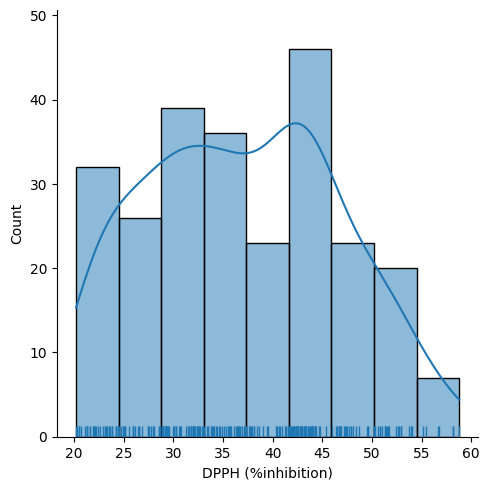

In [ ]:
sns.displot(data=resp.iloc[:, 2], kde=True, rug=True)

### Verification of assumptions

Shapiro-Wilk test for group Time (Month): p-value = 0.06384312361478806
Shapiro-Wilk test for group Time (Month): p-value = 0.01528166513890028
Shapiro-Wilk test for group Time (Month): p-value = 0.008492153137922287
Shapiro-Wilk test for group Time (Month): p-value = 0.2063593566417694
Shapiro-Wilk test for group Time (Month): p-value = 0.058162689208984375
Shapiro-Wilk test for group Time (Month): p-value = 0.17951470613479614
Shapiro-Wilk test for group Time (Month): p-value = 0.0009800983825698495


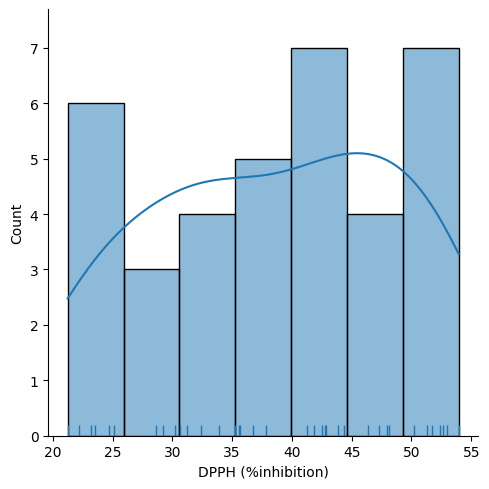

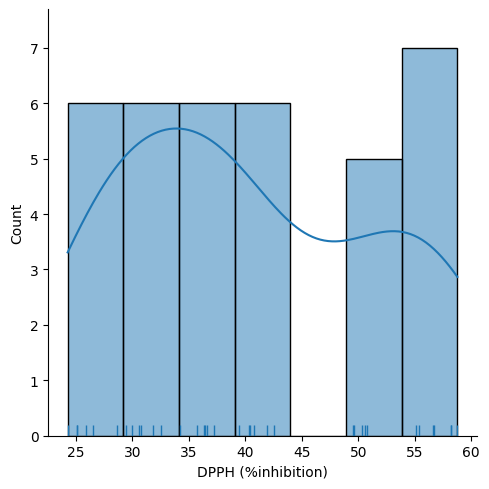

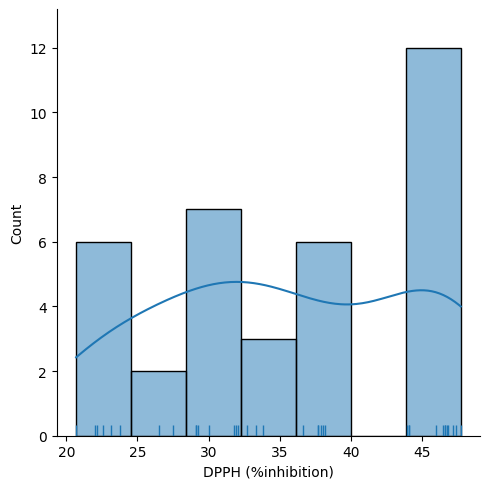

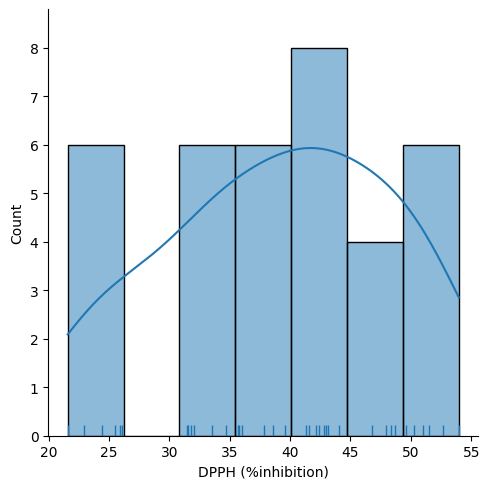

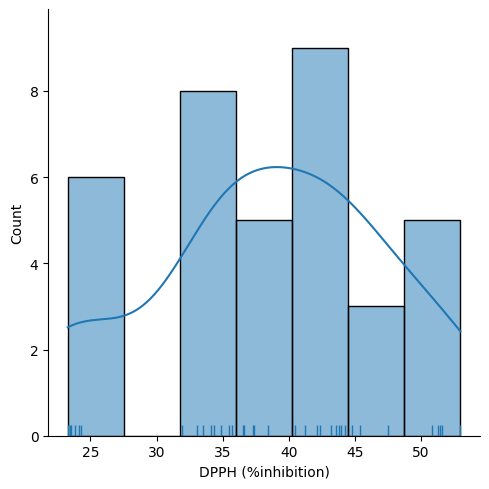

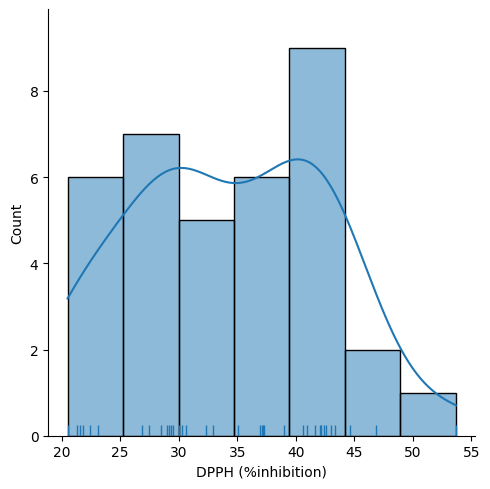

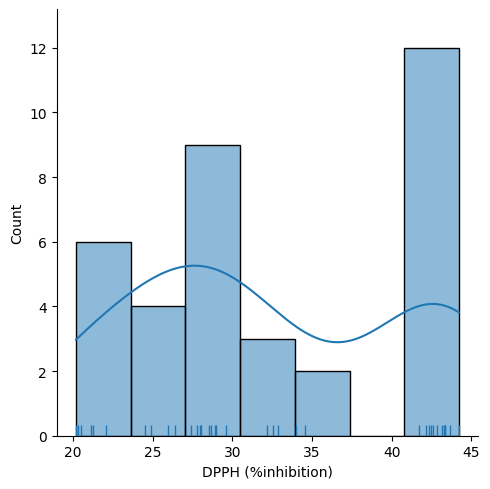

In [ ]:
# Step 1: Normality check
for code in resp['Time (Month)'].unique():
    group_data = resp[resp['Time (Month)'] == code].iloc[:, 2]
    # Visual inspection
    sns.displot(group_data, kde=True, rug=True)
    # Statistical test
    shapiro_test_statistic, shapiro_p_value = shapiro(group_data)
    print(f"Shapiro-Wilk test for group {'Time (Month)'}: p-value = {shapiro_p_value}")
# p> 0.05 = normal distribution of data, make confirmation with plots
# If p-value < 0.05: Reject Ho, which means that the data do not follow a normal distribution (supporting Ha).

Levene's test for homogeneity of variances: p-value = 0.34357850083887786


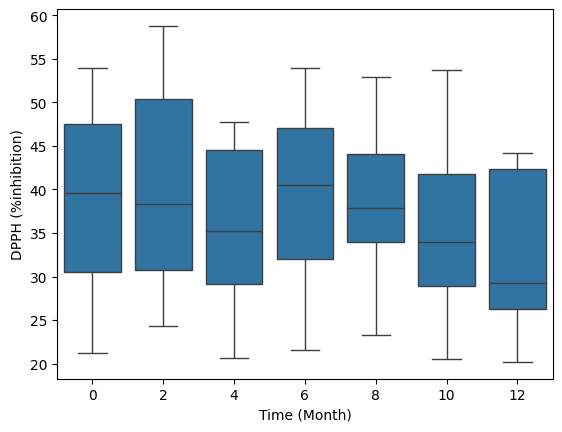

In [ ]:
# Step 2: Homogeneity of variances check
# Visual inspection
sns.boxplot(x='Time (Month)', y=resp.iloc[:, 2], data=resp)
# Statistical test
levene_test_statistic, levene_p_value = levene(*[resp[resp['Time (Month)'] == time].iloc[:, 2] for time in resp['Time (Month)'].unique()])
print(f"Levene's test for homogeneity of variances: p-value = {levene_p_value}")
# p> 0.05 = homogeneity of variance within data, make confirmation with plots
# p<0.05 = Ha
# If p-value < 0.05: Reject Ho, which means that the data do not follow homogeneity of variance (supporting Ha).

#### Non-parametric tests



##### non parametric mean comparison of 3 or more groups

In [ ]:
# Perform Kruskal-Wallis test for main effects of 'Code' and 'Time'
kruskal_code = kruskal(*[group_data.iloc[:, 2] for _, group_data in resp.groupby('Code')])
kruskal_time = kruskal(*[group_data.iloc[:, 2] for _, group_data in resp.groupby('Time (Month)')])

print("Kruskal-Wallis test for main effect of 'Code':")
print(kruskal_code)
print("\nKruskal-Wallis test for main effect of 'Time':")
print(kruskal_time)

# Non-parametric post-hoc test for 'Code' factor (e.g., Dunn's test)
posthoc_code = pairwise_ttests(data=resp, dv=resp.columns[2], between='Code', padjust='holm')

# Non-parametric post-hoc test for 'Time' factor (e.g., Dunn's test)
##posthoc_time = pairwise_ttests(data=resp, dv='DPPH (%inhibition)', between='Time (Month)', padjust='holm')

print("\nPost-hoc pairwise comparisons for 'Code' factor:")
print(posthoc_code)
##print("\nPost-hoc pairwise comparisons for 'Time' factor:")
##print(posthoc_time)

## If p-corr < 0.05: Reject Ho, which means that the means are different (supporting Ha).
## BF10 >1 in favor of Ha, if BF10= 10 => 10 time change Ha rather than H0
## Hedges >0 = "A" group higher mean than "B"
## gral rule 0.2 (small effect), 0.5 (mid) y 0.8 (high)

Kruskal-Wallis test for main effect of 'Code':
KruskalResult(statistic=213.6930239161664, pvalue=3.3322406726524357e-44)

Kruskal-Wallis test for main effect of 'Time':
KruskalResult(statistic=29.149843997470715, pvalue=5.699020438087058e-05)

Post-hoc pairwise comparisons for 'Code' factor:
   Contrast    A    B  Paired  Parametric          T   dof alternative  \
0      Code    A    C   False        True -23.521793  82.0   two-sided   
1      Code    A  C.2   False        True -13.569704  82.0   two-sided   
2      Code    A  C.4   False        True -18.861163  82.0   two-sided   
3      Code    A  C.6   False        True -25.982494  82.0   two-sided   
4      Code    A  C.8   False        True -29.232360  82.0   two-sided   
5      Code    C  C.2   False        True  17.266436  82.0   two-sided   
6      Code    C  C.4   False        True  12.764919  82.0   two-sided   
7      Code    C  C.6   False        True   7.965924  82.0   two-sided   
8      Code    C  C.8   False        True

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [ ]:
# Export the post-hoc pairwise comparisons to Excel
posthoc_code.to_excel('posthoc_code_results.xlsx', index=False)

##### Non parametric mean comparison repeated meassures

In [ ]:
pg.friedman(data=df, dv="K232", within="Time (Month)", subject="Code")

,Source,W,ddof1,Q,p-unc
Friedman,Time (Month),0.77381,6,27.857143,0.0001


In [ ]:
posthoc_time = pg.pairwise_ttests(data=df, dv='K232', within='Time (Month)', subject='Code', padjust='holm')
posthoc_time

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Time (Month),0,2,True,True,-1.687909,5.0,two-sided,0.152231,1.000000,holm,0.95,-0.134942
1,Time (Month),0,4,True,True,4.136520,5.0,two-sided,0.009028,0.162496,holm,7.453,0.276544
2,Time (Month),0,6,True,True,-0.688815,5.0,two-sided,0.521591,1.000000,holm,0.452,-0.035271
3,Time (Month),0,8,True,True,0.284319,5.0,two-sided,0.787565,1.000000,holm,0.386,0.023931
4,Time (Month),0,10,True,True,4.101364,5.0,two-sided,0.009342,0.162496,holm,7.263,0.410807
5,Time (Month),0,12,True,True,2.865741,5.0,two-sided,0.035169,0.337414,holm,2.702,0.583792
6,Time (Month),2,4,True,True,4.038463,5.0,two-sided,0.009938,0.162496,holm,6.932,0.404064
7,Time (Month),2,6,True,True,0.919476,5.0,two-sided,0.400032,1.000000,holm,0.518,0.108275
8,Time (Month),2,8,True,True,1.201076,5.0,two-sided,0.283509,1.000000,holm,0.633,0.166278
9,Time (Month),2,10,True,True,3.769910,5.0,two-sided,0.013024,0.184641,holm,5.657,0.534357


In [ ]:
# Export the post-hoc pairwise comparisons to Excel
posthoc_time.to_excel('posthoc_time_results.xlsx', index=False)

#### Parametric tests

In [ ]:
resp.rename(columns={'Free_Acidity (% oleic acid)': 'Free_acidity', 'Time (Month)': 'Time'}, inplace=True)

<ipython-input-5-667d9edcca70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpph.rename(columns={'DPPH (%inhibition)': 'DPPH_inhibition', 'Time (Month)': 'Time'}, inplace=True)


In [ ]:
modelo = ols('Free_acidity ~ C(Time) + C(Code) + C(Time):C(Code)', data=resp).fit()
result = sm.stats.anova_lm(modelo, type=2)
print(result)

                    df        sum_sq      mean_sq            F         PR(>F)
C(Time)            6.0   1845.633310   307.605552   113.792692   3.383156e-63
C(Code)            5.0  19848.144264  3969.628853  1468.486997  3.400565e-161
C(Time):C(Code)   30.0    979.425267    32.647509    12.077311   2.030049e-31
Residual         210.0    567.674117     2.703210          NaN            NaN


##### Data type re-structure

In [ ]:
resp.dtypes

Code                object
Time                 int64
DPPH_inhibition    float64
dtype: object

In [ ]:
resp["Code"] = resp["Code"].astype("category")
resp["Time"] = resp["Time"].astype("category")

<ipython-input-10-f2b8afa12ba0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpph["Code"] = dpph["Code"].astype("category")
<ipython-input-10-f2b8afa12ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpph["Time"] = dpph["Time"].astype("category")


#### Pos-Hoc Test

In [ ]:
tukey_code = pairwise_tukeyhsd(endog=resp['Free_acidity'],
                                  groups=resp['Code'],
                                  alpha=0.05)

print(tukey_code.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      C  26.0998    0.0   23.772  28.4275   True
     A    C.2   7.1769    0.0   4.8492   9.5046   True
     A    C.4    11.29    0.0   8.9623  13.6177   True
     A    C.6  15.1876    0.0  12.8599  17.5153   True
     A    C.8   22.676    0.0  20.3482  25.0037   True
     C    C.2 -18.9229    0.0 -21.2506 -16.5951   True
     C    C.4 -14.8098    0.0 -17.1375  -12.482   True
     C    C.6 -10.9121    0.0 -13.2399  -8.5844   True
     C    C.8  -3.4238 0.0005  -5.7515  -1.0961   True
   C.2    C.4   4.1131    0.0   1.7854   6.4408   True
   C.2    C.6   8.0107    0.0    5.683  10.3384   True
   C.2    C.8   15.499    0.0  13.1713  17.8268   True
   C.4    C.6   3.8976    0.0   1.5699   6.2253   True
   C.4    C.8   11.386    0.0   9.0582  13.7137   True
   C.6    C.8   7.4883    0.0   5.1606   9.8161   True
----------

In [ ]:
# Convert the summary of "Code" to a DataFrame
tukey_code_df = pd.DataFrame(data=tukey_code._results_table.data[1:], columns=tukey_code._results_table.data[0])

# Export to Excel
tukey_code_df.to_excel('tukey_code_results.xlsx', index=False)